<b>COSMIC RADIATION: Logistic regression</b>
    
rodrigoX: Contains 4 parameters
    1. NALLParticlesTotal : Total number of particles generated by the event in the ground level.
    2. MUTotal : Total number of muons.
    3. ELTotal : Total number of electromagnetic particles.
    4. Zenith : Zenith angle of the particle [degrees].
    5. Energy : Particle energy [GeV].

rodrigoY: contains the target
    Labels: photon, proton, helium, nitrogen, iron.
        the smallest number is assigned to photon (A=0) and the highest number to the heaviest particle, this is, iron (B=4).
        
        0==photon     1==proton    2==helium     3==nitrogen   4==iron 
     
     

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [5]:
#leave the dataset ready
df_x = pd.read_fwf('XRodrigo.txt')
df_x.columns = ["NALLParticlesTotal", "MUTotal", "ELTotal", "Zenith","Energy"]
df_y=pd.read_fwf('YRodrigo.txt')
df_y.columns = ["Particle"]

transpose=df_x.T
transpose_y=df_y.T #Transpose to put them together
df_tot = transpose.append(transpose_y)
df_tot=df_tot.T.sample(frac=1).reset_index(drop=True)#este el el df completo y barajado

df_y=df_tot[['Particle']]
df_x=df_tot[["NALLParticlesTotal", "MUTotal", "ELTotal", "Zenith","Energy"]]

In [17]:
#train-test split and reescale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, random_state=0,test_size = 0.25)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_test_np=y_test.to_numpy()
y_train_np=y_train.to_numpy().flatten()


In [18]:
plt.rcParams["figure.figsize"] = (5, 3) # (w, h)
plt.rcParams["figure.dpi"] = 200
np.random.seed(42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

prediction h of the probability of input x

for classification we will want to use the Cross Entropy Loss function J

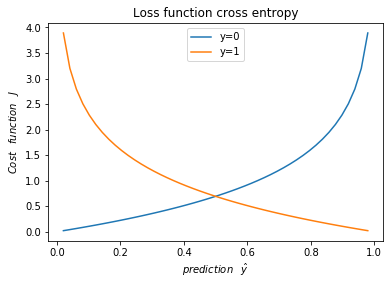

In [11]:
h = np.linspace(0, 1)[1:-1]
for y in [0, 1]:
    plt.plot(h, -y * np.log(h) - (1 - y) * np.log(1 - h), label=f"y={y}")
plt.title("Loss function cross entropy") 
plt.xlabel('$prediction\;\;\; \hat{y}$'); plt.ylabel('$Cost \;\;\; function\;\;\; J$')
plt.legend();

In [20]:
def cost(theta, x, y):
    h = sigmoid(x @ theta)#las prob vienen dadas por la sigmoide de x*theta(theta son los parametros w,b). la sigmoide me deja una distr de porb entre 0,1
    m = len(y)
    cost = 1 / m * np.sum(
        -y * np.log(h) - (1 - y) * np.log(1 - h)
    )
    grad = 1 / m * ((y - h) @ x)
    return cost, grad

In [21]:
def fit(x, y, max_iter=5000, alpha=0.1):
    x = np.insert(x, 0, 1, axis=1) # b is inserted in x
    thetas = []
    classes = np.unique(y) #see how many classes there are
    costs = np.zeros(max_iter)#store values of cost function

    for c in classes:
        # one vs. rest binary classification
        binary_y = np.where(y == c, 1, 0) #loop for each class
        
        theta = np.zeros(x.shape[1]) #initialize theta to zeros (not the best way to do it)
        for epoch in range(max_iter):
            costs[epoch], grad = cost(theta, x, binary_y) #compute cost functinon and its gradient
            theta += alpha * grad  #update w
            
        thetas.append(theta) 
    return thetas, classes, costs

In [22]:
def predict(classes, thetas, x):
    x = np.insert(x, 0, 1, axis=1)
    preds = [np.argmax(
        [sigmoid(xi @ theta) for theta in thetas] #see the highest prob for each class
    ) for xi in x]
    return [classes[p] for p in preds]

In [26]:
def score(classes, theta, x, y):
    return (predict(classes, theta, x) == y).mean()

print(f"Train Accuracy: {score(classes, thetas, X_train[:, 2:], y_train_np):.3f}")
print(f"Test Accuracy: {score(classes, thetas, X_test[:, 2:], y_test_np):.3f}")

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 4)

In [27]:
thetas, classes, costs = fit(X_train, y_train_np)
print(f"Train Accuracy: {score(classes, thetas, X_train, y_train_np):.3f}")
print(f"Test Accuracy: {score(classes, thetas, X_test, y_test_np):.3f}")

Train Accuracy: 0.438
Test Accuracy: 0.440


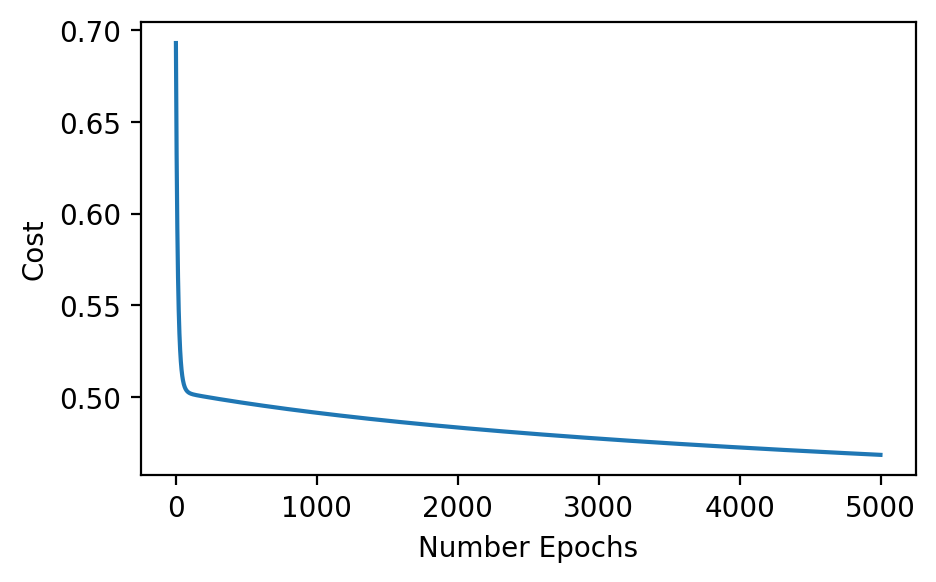

In [28]:
thetas, classes, costs = fit(X_train, y_train_np)
plt.plot(costs)
plt.xlabel('Number Epochs'); plt.ylabel('Cost');